# Postprocessing and Model Building

In [1]:
import os
import pickle
import json

In [2]:
main_filepath = '/projects/kernlab/akapoor/Demographic_Inference'

CONFIG_FILEPATH = f'{main_filepath}/experiment_config.json'
MODEL_CONFIG_FILEPATH = f'{main_filepath}/model_config.json'

with open(CONFIG_FILEPATH, 'r') as f:
   experiment_config = json.load(f)

with open(MODEL_CONFIG_FILEPATH, 'r') as f:
   model_config = json.load(f)


CWD = os.getcwd()

# Use double quotes for the dictionary keys inside the f-string
EXPERIMENT_DIRECTORY = f"{experiment_config['demographic_model']}_dadi_analysis_{experiment_config['dadi_analysis']}_moments_analysis_{experiment_config['moments_analysis']}_momentsLD_analysis_{experiment_config['momentsLD_analysis']}_seed_{experiment_config['seed']}"
EXPERIMENT_NAME = f'sims_pretrain_{experiment_config["num_sims_pretrain"]}_sims_inference_{experiment_config["num_sims_inference"]}_seed_{experiment_config["seed"]}_num_replicates_{experiment_config["k"]}_top_values_{experiment_config["top_values_k"]}'
SIM_DIRECTORY = f"{EXPERIMENT_DIRECTORY}/sims/{EXPERIMENT_NAME}"

# Check if hidden_size is a list, and if so, join the elements with "_"
hidden_size = model_config['neural_net_hyperparameters']['hidden_size']
if isinstance(hidden_size, list):
    hidden_size_str = "_".join(map(str, hidden_size))  # Join list elements with "_"
else:
    hidden_size_str = str(hidden_size)  # Convert integer to string if not a list

# Build the MODEL_DIRECTORY string
MODEL_DIRECTORY = (
    f"{EXPERIMENT_DIRECTORY}/models/{EXPERIMENT_NAME}/"
    f"num_hidden_neurons_{hidden_size_str}_"
    f"num_hidden_layers_{model_config['neural_net_hyperparameters']['num_layers']}_"
    f"num_epochs_{model_config['neural_net_hyperparameters']['num_epochs']}_"
    f"dropout_value_{model_config['neural_net_hyperparameters']['dropout_rate']}_"
    f"weight_decay_{model_config['neural_net_hyperparameters']['weight_decay']}_"
    f"batch_size_{model_config['neural_net_hyperparameters']['batch_size']}_"
    f"EarlyStopping_{model_config['neural_net_hyperparameters']['EarlyStopping']}"
)


In [3]:
os.chdir('/projects/kernlab/akapoor/Demographic_Inference/')
os.environ['PYTHONPATH'] = '/projects/kernlab/akapoor/Demographic_Inference:' + os.environ.get('PYTHONPATH', '')

Just to check again, I want to look at the results for preprocessing

In [4]:
with open('/projects/kernlab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preproc = pickle.load(f)

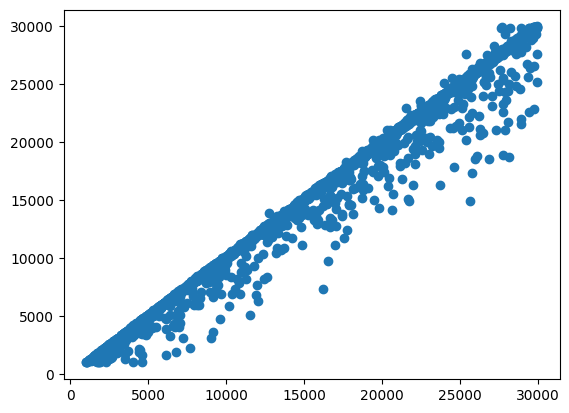

In [9]:
import matplotlib.pyplot as plt
plt.scatter(preproc['training']['predictions']['moments_rep1_Na'], preproc['training']['targets']['simulated_params_Na'])
plt.show()

## Postprocessing

In [10]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/postprocessing.py \
    --config_file $CONFIG_FILEPATH \
    --training_features_filepath $SIM_DIRECTORY/training_features.csv \
    --training_targets_filepath $SIM_DIRECTORY/training_targets.csv \
    --validation_features_filepath $SIM_DIRECTORY/validation_features.csv \
    --validation_targets_filepath $SIM_DIRECTORY/validation_targets.csv \
    --sim_directory $SIM_DIRECTORY



Processing training data:
===> Normalizing the data.

Processing validation data:
===> Normalizing the data.
Postprocessing dict keys: dict_keys(['normalization', 'predictions', 'normalized_predictions', 'targets', 'normalized_targets'])
Postprocessing complete!


In [11]:
with open('/projects/kernlab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_results.pkl', 'rb') as f:
    post = pickle.load(f)

In [40]:
post['training']['normalized_predictions']

,dadi_rep1_Na,moments_rep1_Na,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,moments_rep1_FIM_element_6,moments_rep1_FIM_element_7,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,0.191407,0.215889,0.138327,0.145901,0.094366,0.123649,0.207858,-0.181595,0.481337,0.012961,...,-0.986074,-0.976220,0.272248,0.290034,-1.138805,-1.132945,0.284087,-0.996919,0.355318,-1.145828
1,-1.435452,-1.423523,0.258676,0.413986,-0.288993,0.543784,0.226043,-0.321719,0.483242,0.317221,...,1.066553,1.105569,-0.950328,-0.939498,-1.356239,-1.350936,-1.440296,1.201286,-0.941924,-1.357089
2,-0.402880,-0.380384,0.256025,0.366993,-0.259499,0.514824,0.198807,-0.139694,0.388186,0.092622,...,1.279642,1.312072,-0.683621,-0.669236,-1.288459,-1.285806,-0.309038,1.345460,-0.668596,-1.294627
3,-0.084990,-0.062509,0.238416,0.236748,-0.248104,0.548924,0.151671,-0.191376,0.065849,0.282063,...,0.193612,0.212500,-0.726818,-0.715296,-0.247069,-0.233211,-0.049983,0.216104,-0.710591,-0.248280
4,1.685484,1.728007,0.040047,-1.157153,-0.006882,0.066893,-0.394271,0.450714,-0.935654,0.183065,...,-0.281004,-0.270443,-0.825268,-0.818053,0.403917,0.411375,1.640133,-0.258573,-0.792319,0.435582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,1.524068,1.549379,-2.113317,-5.188332,8.293258,-0.427994,-0.295840,3.587909,0.161576,-5.703806,...,-1.487021,-1.483376,-1.082287,-1.077210,-1.543318,-1.542566,1.508547,-1.471402,-1.051058,-1.532715
3671,0.850233,0.881010,-0.090445,-0.099466,-0.046646,-1.539499,0.168035,-0.241204,0.208612,0.287306,...,-0.977765,-0.969345,0.626553,0.647027,1.028186,1.051600,0.911809,-0.955030,0.668924,1.028057
3672,-0.096399,-0.083870,-0.069720,-0.708439,0.031330,-0.027494,0.020031,-0.032372,0.162905,0.251453,...,-1.418607,-1.416231,-1.247471,-1.244301,-0.804660,-0.812095,-0.137162,-1.419122,-1.251994,-0.799558
3673,-1.041196,-0.423494,0.246998,0.253661,-0.276917,0.452115,-0.180501,-0.180952,-0.904634,0.324282,...,0.307637,0.355542,-1.308681,-1.301565,0.948173,1.019922,-0.856313,0.548061,-1.060079,1.142741


In [27]:
post['training']['predictions'].columns

Index(['dadi_rep1_Na', 'moments_rep1_Na', 'moments_rep1_FIM_element_0',
       'moments_rep1_FIM_element_1', 'moments_rep1_FIM_element_2',
       'moments_rep1_FIM_element_3', 'moments_rep1_FIM_element_4',
       'moments_rep1_FIM_element_5', 'moments_rep1_FIM_element_6',
       'moments_rep1_FIM_element_7', 'moments_rep1_FIM_element_8',
       'moments_rep1_FIM_element_9', 'dadi_rep1_N1', 'moments_rep1_N1',
       'dadi_rep1_N2', 'moments_rep1_N2', 'dadi_rep1_t_split',
       'moments_rep1_t_split', 'dadi_rep2_Na', 'moments_rep2_Na',
       'moments_rep2_FIM_element_0', 'moments_rep2_FIM_element_1',
       'moments_rep2_FIM_element_2', 'moments_rep2_FIM_element_3',
       'moments_rep2_FIM_element_4', 'moments_rep2_FIM_element_5',
       'moments_rep2_FIM_element_6', 'moments_rep2_FIM_element_7',
       'moments_rep2_FIM_element_8', 'moments_rep2_FIM_element_9',
       'dadi_rep2_N1', 'moments_rep2_N1', 'dadi_rep2_N2', 'moments_rep2_N2',
       'dadi_rep2_t_split', 'moments_rep2_t_spl

In [28]:
post['training']['targets'].columns

Index(['simulated_params_Na', 'simulated_params_N1', 'simulated_params_N2',
       'simulated_params_t_split'],
      dtype='object')

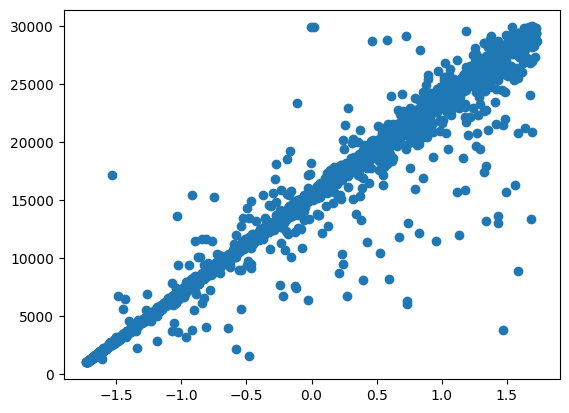

In [26]:
plt.figure()
plt.scatter(post['training']['normalized_predictions']['momentsLD_N1'], post['training']['targets']['simulated_params_N1'])
plt.show()

## Calculate the MSE for each analysis type and for each stage.

In [42]:
post['training']['normalized_predictions']

,dadi_rep1_Na,moments_rep1_Na,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,moments_rep1_FIM_element_6,moments_rep1_FIM_element_7,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,0.191407,0.215889,0.138327,0.145901,0.094366,0.123649,0.207858,-0.181595,0.481337,0.012961,...,-0.986074,-0.976220,0.272248,0.290034,-1.138805,-1.132945,0.284087,-0.996919,0.355318,-1.145828
1,-1.435452,-1.423523,0.258676,0.413986,-0.288993,0.543784,0.226043,-0.321719,0.483242,0.317221,...,1.066553,1.105569,-0.950328,-0.939498,-1.356239,-1.350936,-1.440296,1.201286,-0.941924,-1.357089
2,-0.402880,-0.380384,0.256025,0.366993,-0.259499,0.514824,0.198807,-0.139694,0.388186,0.092622,...,1.279642,1.312072,-0.683621,-0.669236,-1.288459,-1.285806,-0.309038,1.345460,-0.668596,-1.294627
3,-0.084990,-0.062509,0.238416,0.236748,-0.248104,0.548924,0.151671,-0.191376,0.065849,0.282063,...,0.193612,0.212500,-0.726818,-0.715296,-0.247069,-0.233211,-0.049983,0.216104,-0.710591,-0.248280
4,1.685484,1.728007,0.040047,-1.157153,-0.006882,0.066893,-0.394271,0.450714,-0.935654,0.183065,...,-0.281004,-0.270443,-0.825268,-0.818053,0.403917,0.411375,1.640133,-0.258573,-0.792319,0.435582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,1.524068,1.549379,-2.113317,-5.188332,8.293258,-0.427994,-0.295840,3.587909,0.161576,-5.703806,...,-1.487021,-1.483376,-1.082287,-1.077210,-1.543318,-1.542566,1.508547,-1.471402,-1.051058,-1.532715
3671,0.850233,0.881010,-0.090445,-0.099466,-0.046646,-1.539499,0.168035,-0.241204,0.208612,0.287306,...,-0.977765,-0.969345,0.626553,0.647027,1.028186,1.051600,0.911809,-0.955030,0.668924,1.028057
3672,-0.096399,-0.083870,-0.069720,-0.708439,0.031330,-0.027494,0.020031,-0.032372,0.162905,0.251453,...,-1.418607,-1.416231,-1.247471,-1.244301,-0.804660,-0.812095,-0.137162,-1.419122,-1.251994,-0.799558
3673,-1.041196,-0.423494,0.246998,0.253661,-0.276917,0.452115,-0.180501,-0.180952,-0.904634,0.324282,...,0.307637,0.355542,-1.308681,-1.301565,0.948173,1.019922,-0.856313,0.548061,-1.060079,1.142741


In [46]:
mean_squared_error(post['training']['normalized_predictions']['dadi_rep1_N1'], post['training']['targets']['simulated_params_N1'])

295387208.2301021

In [47]:
post['training']['normalized_predictions']['dadi_rep1_N1']

0      -0.986066
1       1.066540
2       1.284307
3       0.193610
4      -0.275621
          ...   
3670   -1.488827
3671   -0.977763
3672   -1.420655
3673    0.330562
3674    0.563570
Name: dadi_rep1_N1, Length: 3675, dtype: float64

In [50]:
post['training'].keys()

dict_keys(['normalization', 'predictions', 'normalized_predictions', 'targets', 'normalized_targets'])

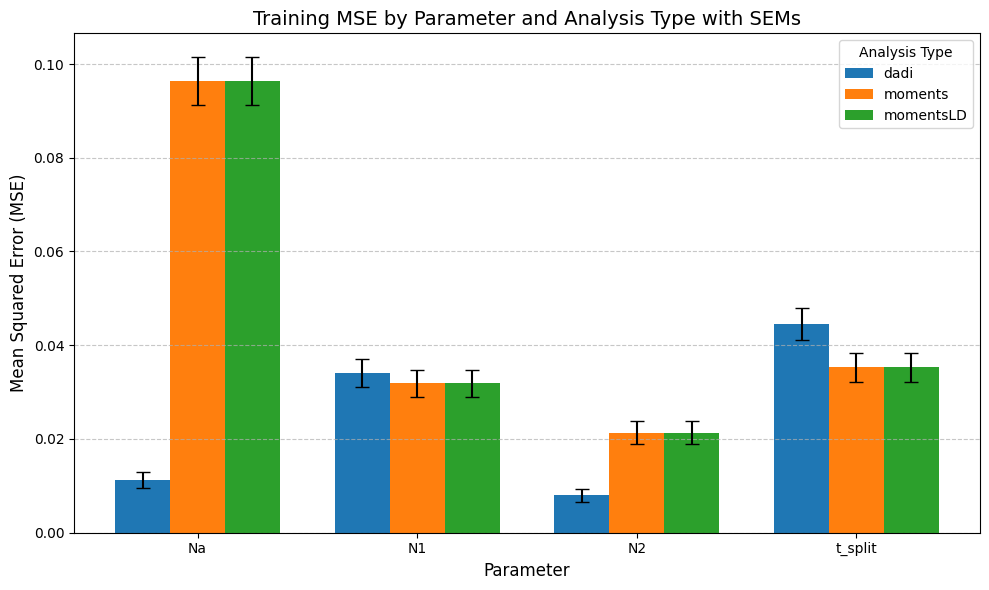

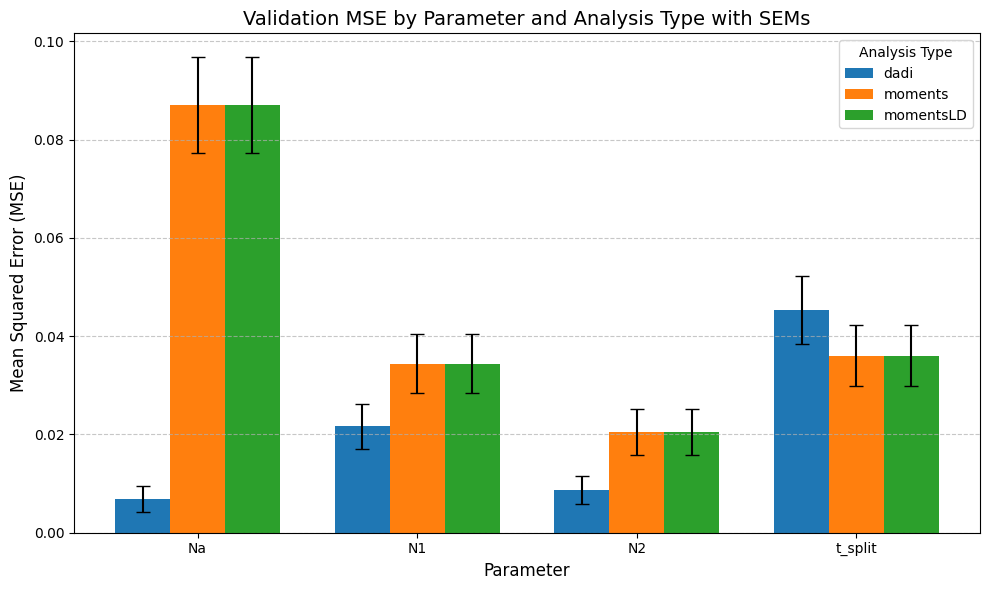

In [65]:
# Updated function to handle underscores in parameter names correctly
def calculate_mse_and_sem(post, key):
    predictions = post[key]['normalized_predictions']
    targets = post[key]['normalized_targets']
    mse_results = {}
    sem_results = {}

    for analysis_type in ['dadi', 'moments', 'momentsLD']:
        mse_values = {}
        sem_values = {}
        for column in predictions.columns:
            if column.startswith(analysis_type):
                # Extract parameter name after the last '_'
                param_name = "_".join(column.split('_')[-2:]) if 't_split' in column else column.split('_')[-1]
                target_column = f"simulated_params_{param_name}"
                if target_column in targets.columns:
                    mse = mean_squared_error(targets[target_column], predictions[column])
                    mse_values[param_name] = mse
                    sem = np.std(targets[target_column] - predictions[column]) / np.sqrt(len(targets[target_column]))
                    sem_values[param_name] = sem
        if mse_values:
            mse_results[analysis_type] = mse_values
            sem_results[analysis_type] = sem_values
    return mse_results, sem_results

# Parameters list
parameters = ['Na', 'N1', 'N2', "t_split"]

# Recalculate MSE and SEM for training and validation with the updated function
training_mse, training_sem = calculate_mse_and_sem(post, 'training')
validation_mse, validation_sem = calculate_mse_and_sem(post, 'validation')

# Re-plot with the fixed parameter handling
plot_mse_and_sem(training_mse, training_sem, "Training MSE by Parameter and Analysis Type with SEMs", parameters)
plot_mse_and_sem(validation_mse, validation_sem, "Validation MSE by Parameter and Analysis Type with SEMs", parameters)

In [52]:
training_mse

{'dadi': 0.011881147001933849,
 'moments': 0.021548367575305677,
 'momentsLD': 0.04985375140009082}

In [53]:
validation_mse

{'dadi': 0.00986358101373411,
 'moments': 0.019940829508923695,
 'momentsLD': 0.047312892219379545}

## Extracting Features

In [13]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/extracting_features.py \
 --postprocessing_results_filepath $SIM_DIRECTORY/postprocessing_results.pkl \
 --sim_directory $SIM_DIRECTORY

dict_keys(['parameter_names', 'target_names', 'training', 'validation'])
Training features shape: (3675, 40)
Validation features shape: (919, 40)
Training targets shape: (3675, 4)
Validation targets shape: (919, 4)


## Linear Evaluation

In [14]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type standard

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
Initializing LinearRegression with kwargs={}
PREDICTIONS SHAPE TRAINING: (3675, 4)
[5.67485791e-05 4.36518688e-05 2.83986615e-04 ... 1.14023146e-04
 4.01392502e-03 9.83888889e-04]
[6.21697633e-03 4.07060088e-04 6.38704201e-04 5.06996276e-03
 6.19604556e-04 6.85163598e-04 6.00316967e-03 6.33516959e-05
 6.65286884e-03 1.16095908e-04 1.80264368e-05 1.06601966e-04
 2.57321822e-05 4.73689400e-04 7.14660167e-04 2.57384162e-04
 9.65518410e-03 3.37746040e-04 9.00692799e-04 1.02725251e-03
 2.89495372e-04 3.06890427e-04 6.92868860e-05 1.59495639e-03
 2.34304061e-04 4.76449771e-04 6.58861687e-04 3.31235364e-03
 1.98751143e-04 6.44097307e-04 1.30367401e-03 8.59923018e-04


### Ridge

In [18]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type ridge

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
Best parameters for ridge: {'alpha': 100.0}
Initializing Ridge with kwargs={'alpha': 100.0}
PREDICTIONS SHAPE TRAINING: (3675, 4)
[6.10146774e-05 3.88702271e-05 2.78991471e-04 ... 1.16543456e-04
 3.97196880e-03 9.71493521e-04]
[6.27457399e-03 4.13868289e-04 5.74520774e-04 5.06634810e-03
 5.58017300e-04 6.83370767e-04 6.07746948e-03 6.28261920e-05
 6.52399092e-03 1.04424063e-04 1.87640422e-05 1.19942983e-04
 3.40883055e-05 4.69194540e-04 7.01719870e-04 2.55602045e-04
 9.65691594e-03 3.28192290e-04 6.19560935e-04 9.98748426e-04
 2.83343652e-04 2.74556237e-04 5.92506472e-05 1.58913357e-03
 2.49668950e-04 4.65582957e-04 6.44324665e-04 3.21520068e-03
 1.97431040e-0

### Lasso

In [19]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type lasso

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e-01, tolerance: 2.811e-01
  model = cd_fast.enet_coordinate_descent(
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

### Elastic Net

In [20]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type elasticnet

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e-01, tolerance: 2.811e-01
  model = cd_fast.enet_coordinate_descent(
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

## Random Forest

In [16]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/random_forest_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'random_state': 2023, 'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 30}

Initializing RandomForestRegressor with kwargs={'n_estimators': 50, 'max_depth': 30, 'random_state': 2023, 'min_samples_split': 5}

Random Forest predictions shape (training): (3675, 4)
Random Forest predictions shape (validation): (919, 4)

[1.02162180e-05 8.63869056e-07 4.34233223e-06 ... 3.19702288e-05
 7.89307520e-05 3.34238700e-05]
[3.91846526e-03 1.21079815e-04 1.9878056

## XGBoost

In [17]:
 !python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/xgboost_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No XGBoost hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}

Initializing XGBRegressor with kwargs={'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.6, 'min_child_weight': 5, 'reg_lambda': 1, 'reg_alpha': 0.5}

XGBoost predictions shape (training): (3675, 4)
XGBoost predictions shape (validation): (919

## Neural Network

In [ ]:
    # parser.add_argument("--experiment_directory", type=str, required=True)
    # parser.add_argument("--model_config_file", type=str, required=True)
    # parser.add_argument("--features_file", type=str, required=True)
    # parser.add_argument("--color_shades", type=str, required=True)
    # parser.add_argument("--main_colors", type=str, required=True)

In [50]:
!python /sietch_colab/akapoor/Demographic_Inference/snakemake_scripts/setup_trainer.py \
    --experiment_directory $EXPERIMENT_DIRECTORY \
    --model_config_file $MODEL_CONFIG_FILEPATH \
    --features_file $SIM_DIRECTORY/features_and_targets.pkl \
    --color_shades $SIM_DIRECTORY/color_shades.pkl \
    --main_colors $SIM_DIRECTORY/main_colors.pkl

Max Values in the dataset:
  Training features max: dadi_rep1_Na                  29463.672544
moments_rep1_Na               29856.497542
moments_rep1_FIM_element_0        0.254189
moments_rep1_FIM_element_1        0.287948
moments_rep1_FIM_element_2       17.340964
moments_rep1_FIM_element_3        0.653049
moments_rep1_FIM_element_4        0.120641
moments_rep1_FIM_element_5       18.464149
moments_rep1_FIM_element_6        0.658112
moments_rep1_FIM_element_7        0.343955
moments_rep1_FIM_element_8        2.814908
moments_rep1_FIM_element_9        4.545339
dadi_rep1_N1                  29554.623419
moments_rep1_N1               29885.956435
dadi_rep1_N2                  29582.069317
moments_rep1_N2               29868.185783
dadi_rep1_t_split             19930.419102
moments_rep1_t_split          19817.833040
dadi_rep2_Na                  29611.360053
moments_rep2_Na               29857.481577
moments_rep2_FIM_element_0        0.261474
moments_rep2_FIM_element_1        0.412274
mo

In [20]:
import torch
print("Is CUDA available?", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.current_device())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Is CUDA available? False
Number of GPUs: 0


/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


RuntimeError: No CUDA GPUs are available